In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melting-point/sample_submission.csv
/kaggle/input/melting-point/train.csv
/kaggle/input/melting-point/test.csv


# **EDA**

In [30]:
train = pd.read_csv('/kaggle/input/melting-point/train.csv')
train

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,707,ClCCBr,256.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,1573,N#CC(Cl)(Cl)Cl,231.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,1634,Cc1ccc2c(C)cccc2c1,256.25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,3022,CCC(=O)c1ccc2ccccc2c1,333.15,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Columns: 427 entries, id to Group 424
dtypes: float64(1), int64(425), object(1)
memory usage: 8.7+ MB


In [32]:
train.describe()

,id,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,...,2662.000000,2662.000000,2662.0,2662.000000,2662.0,2662.0,2662.0,2662.0,2662.0,2662.0
mean,1652.887303,278.263452,1.020661,1.582269,0.114951,0.036439,0.036814,0.022915,0.013524,0.010143,...,0.001127,0.000751,0.0,0.001878,0.0,0.0,0.0,0.0,0.0,0.0
std,955.005512,85.117914,1.353640,3.738416,0.425964,0.208307,0.205516,0.164037,0.118732,0.117480,...,0.033558,0.027405,0.0,0.058126,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,53.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,830.250000,217.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,1642.500000,277.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,2469.750000,325.150000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,3328.000000,897.150000,16.000000,42.000000,6.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Check if there are any null values
train.isnull().any().any()

False

In [34]:
train.dtypes

id             int64
SMILES        object
Tm           float64
Group 1        int64
Group 2        int64
              ...   
Group 420      int64
Group 421      int64
Group 422      int64
Group 423      int64
Group 424      int64
Length: 427, dtype: object

In [35]:
train.Tm.dtypes == object

False

In [36]:
import seaborn as sns

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
'''
for col in train.columns:
    if train[col].dtype != 'object' and col != 'id':  # Use bracket notation and string comparison
        plt.figure(figsize=(8, 4))  # Create a new figure for each plot
        sns.histplot(data=train, x=col)
        plt.title(f'Distribution of {col}')
        plt.show()
'''

"\nfor col in train.columns:\n    if train[col].dtype != 'object' and col != 'id':  # Use bracket notation and string comparison\n        plt.figure(figsize=(8, 4))  # Create a new figure for each plot\n        sns.histplot(data=train, x=col)\n        plt.title(f'Distribution of {col}')\n        plt.show()\n"

* As far as we can see, there are a lot of groups where there are only one value such as Group 424 as an example so for data preprocessing, we can remove the features as such

* We can also see that classes aren't balanced at all where for examples, in group 418 : there are almost none other values than 0 and it is most cases for a large number of features so we will have to deal with thoses imbalances and uses class weigth

In [38]:
print(len(train.iloc[:,-1].unique()))
print(train.iloc[:,15].unique())

1
[0 1 2]


In [39]:
train.shape[1]

427

In [40]:
# Function that remove features where there are only 1 unique values

def remove_unique(df=pd.DataFrame()):
    df = df.copy()
    ls = []
    for col in df.columns:
        if len(df[col].unique()) == 1:
            df = df.drop(columns=col)
            ls.append(col)
    return df, ls

In [41]:
train_io, list_removed = remove_unique(train)
print(f'Shape of train: {train.shape}')
print(f'Shape of train after removing features with unique value: {train_io.shape}')

Shape of train: (2662, 427)
Shape of train after removing features with unique value: (2662, 340)


In [53]:
print(list_removed)

['Group 12', 'Group 28', 'Group 46', 'Group 67', 'Group 73', 'Group 74', 'Group 75', 'Group 84', 'Group 85', 'Group 88', 'Group 90', 'Group 101', 'Group 102', 'Group 104', 'Group 150', 'Group 152', 'Group 155', 'Group 158', 'Group 160', 'Group 167', 'Group 183', 'Group 194', 'Group 198', 'Group 206', 'Group 207', 'Group 208', 'Group 209', 'Group 212', 'Group 213', 'Group 214', 'Group 215', 'Group 216', 'Group 217', 'Group 218', 'Group 245', 'Group 247', 'Group 248', 'Group 250', 'Group 252', 'Group 253', 'Group 264', 'Group 280', 'Group 281', 'Group 282', 'Group 285', 'Group 294', 'Group 303', 'Group 306', 'Group 307', 'Group 308', 'Group 309', 'Group 312', 'Group 313', 'Group 316', 'Group 317', 'Group 340', 'Group 342', 'Group 345', 'Group 347', 'Group 348', 'Group 349', 'Group 350', 'Group 352', 'Group 355', 'Group 356', 'Group 357', 'Group 358', 'Group 360', 'Group 363', 'Group 371', 'Group 376', 'Group 377', 'Group 383', 'Group 384', 'Group 385', 'Group 390', 'Group 397', 'Group 39

In [42]:
'''
for col in train_io.columns:
    if train[col].dtype != 'object' and col != 'id':  # Use bracket notation and string comparison
        plt.figure(figsize=(8, 4))  # Create a new figure for each plot
        sns.histplot(data=train_io, x=col)
        plt.title(f'Distribution of {col}')
        plt.show()
'''

"\nfor col in train_io.columns:\n    if train[col].dtype != 'object' and col != 'id':  # Use bracket notation and string comparison\n        plt.figure(figsize=(8, 4))  # Create a new figure for each plot\n        sns.histplot(data=train_io, x=col)\n        plt.title(f'Distribution of {col}')\n        plt.show()\n"

In [43]:
train_iop = train_io.iloc[:, 2:]
train_iop

,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,...,Group 406,Group 407,Group 408,Group 409,Group 410,Group 412,Group 414,Group 415,Group 416,Group 418
0,213.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,407.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,324.15,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,351.15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,126.15,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,256.45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,231.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,256.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,333.15,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


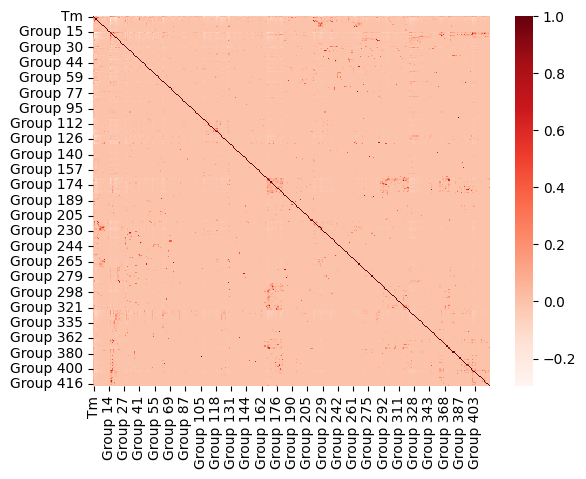

In [44]:
# Let's get a look into correlation between values 
sns.heatmap(train_iop.corr(), cmap='Reds');

In [45]:
train_iop.corr().iloc[:,0].sort_values(ascending=False).head(10)

Tm           1.000000
Group 15     0.387580
Group 18     0.223551
Group 16     0.223530
Group 401    0.222525
Group 17     0.194420
Group 123    0.179178
Group 365    0.176346
Group 31     0.171773
Group 412    0.165621
Name: Tm, dtype: float64

In [46]:
train_iop.corr().iloc[:,0].sort_values(ascending=False).tail(10)

Group 222   -0.085987
Group 129   -0.086298
Group 229   -0.104042
Group 3     -0.104648
Group 227   -0.109124
Group 119   -0.109563
Group 7     -0.109899
Group 221   -0.120362
Group 5     -0.158361
Group 1     -0.186595
Name: Tm, dtype: float64

In [47]:
train_iop.corr().iloc[:,0].apply(np.abs).sort_values(ascending=False).head(20)

Tm           1.000000
Group 15     0.387580
Group 18     0.223551
Group 16     0.223530
Group 401    0.222525
Group 17     0.194420
Group 1      0.186595
Group 123    0.179178
Group 365    0.176346
Group 31     0.171773
Group 412    0.165621
Group 30     0.162579
Group 5      0.158361
Group 326    0.151604
Group 62     0.150432
Group 373    0.129026
Group 403    0.125958
Group 126    0.122881
Group 221    0.120362
Group 180    0.114525
Name: Tm, dtype: float64

In [48]:
train_iop.corr().iloc[:,0].apply(np.abs).sort_values(ascending=False).tail(20)

Group 233    0.004351
Group 113    0.004126
Group 283    0.003837
Group 184    0.003580
Group 292    0.003232
Group 146    0.003215
Group 359    0.003047
Group 65     0.002842
Group 407    0.002532
Group 240    0.002207
Group 210    0.002030
Group 238    0.001970
Group 354    0.001767
Group 243    0.001364
Group 182    0.001350
Group 237    0.001337
Group 21     0.001247
Group 271    0.001005
Group 251    0.000589
Group 279    0.000447
Name: Tm, dtype: float64

In [49]:
# Get correlations with the first column
correlations = train_iop.corr().iloc[:, 0]

# Filter for features with very low correlation (absolute value < 0.01)
low_corr_features = correlations[np.abs(correlations) < 0.01]
print(low_corr_features)

Group 21     0.001247
Group 26    -0.007597
Group 51    -0.004886
Group 54    -0.008853
Group 55     0.004907
               ...   
Group 362   -0.007771
Group 368    0.008663
Group 370   -0.004838
Group 387    0.009997
Group 407   -0.002532
Name: Tm, Length: 62, dtype: float64


In [50]:
low_corr_index = low_corr_features.index
print(low_corr_index, len(low_corr_index))

Index(['Group 21', 'Group 26', 'Group 51', 'Group 54', 'Group 55', 'Group 65',
       'Group 76', 'Group 79', 'Group 82', 'Group 91', 'Group 93', 'Group 107',
       'Group 113', 'Group 131', 'Group 133', 'Group 141', 'Group 142',
       'Group 146', 'Group 153', 'Group 168', 'Group 171', 'Group 182',
       'Group 184', 'Group 185', 'Group 188', 'Group 205', 'Group 210',
       'Group 225', 'Group 231', 'Group 232', 'Group 233', 'Group 235',
       'Group 237', 'Group 238', 'Group 240', 'Group 243', 'Group 251',
       'Group 259', 'Group 271', 'Group 272', 'Group 276', 'Group 279',
       'Group 283', 'Group 284', 'Group 286', 'Group 290', 'Group 292',
       'Group 295', 'Group 299', 'Group 301', 'Group 311', 'Group 318',
       'Group 333', 'Group 336', 'Group 353', 'Group 354', 'Group 359',
       'Group 362', 'Group 368', 'Group 370', 'Group 387', 'Group 407'],
      dtype='object') 62


In [51]:
# Prepared for the training
train_iop

,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,...,Group 406,Group 407,Group 408,Group 409,Group 410,Group 412,Group 414,Group 415,Group 416,Group 418
0,213.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,407.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,324.15,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,351.15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,126.15,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,256.45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,231.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,256.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,333.15,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
train_iop_nlc = train_iop.drop(columns=low_corr_index)
train_iop_nlc

,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,...,Group 405,Group 406,Group 408,Group 409,Group 410,Group 412,Group 414,Group 415,Group 416,Group 418
0,213.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,407.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,324.15,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,351.15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,126.15,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,256.45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,231.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,256.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,333.15,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
list_removed

['Group 12',
 'Group 28',
 'Group 46',
 'Group 67',
 'Group 73',
 'Group 74',
 'Group 75',
 'Group 84',
 'Group 85',
 'Group 88',
 'Group 90',
 'Group 101',
 'Group 102',
 'Group 104',
 'Group 150',
 'Group 152',
 'Group 155',
 'Group 158',
 'Group 160',
 'Group 167',
 'Group 183',
 'Group 194',
 'Group 198',
 'Group 206',
 'Group 207',
 'Group 208',
 'Group 209',
 'Group 212',
 'Group 213',
 'Group 214',
 'Group 215',
 'Group 216',
 'Group 217',
 'Group 218',
 'Group 245',
 'Group 247',
 'Group 248',
 'Group 250',
 'Group 252',
 'Group 253',
 'Group 264',
 'Group 280',
 'Group 281',
 'Group 282',
 'Group 285',
 'Group 294',
 'Group 303',
 'Group 306',
 'Group 307',
 'Group 308',
 'Group 309',
 'Group 312',
 'Group 313',
 'Group 316',
 'Group 317',
 'Group 340',
 'Group 342',
 'Group 345',
 'Group 347',
 'Group 348',
 'Group 349',
 'Group 350',
 'Group 352',
 'Group 355',
 'Group 356',
 'Group 357',
 'Group 358',
 'Group 360',
 'Group 363',
 'Group 371',
 'Group 376',
 'Group 377',
 'G

In [61]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

X_iop_train = train_iop.drop(columns='Tm')
y_iop_train = train_iop.Tm

X_nlc_train = train_iop_nlc.drop(columns='Tm')
y_nlc_train = train_iop_nlc.Tm
'''
# Trees don't need scaling for performance, but it can speed up training.
model_iop_hgbr = make_pipeline(
    HistGradientBoostingRegressor(loss='absolute_error', learning_rate=0.01, max_iter=200, random_state=42)
)
model_iop_hgbr.fit(X_iop_train, y_iop_train)

print('Fitted model without taking in account correlation with HGBR done')
 '''   
model_iop_rfr = make_pipeline(
    RandomForestRegressor(n_estimators=200, criterion='absolute_error', random_state=42)
)
model_iop_rfr.fit(X_iop_train, y_iop_train)

print('Fitted model without taking in account correlation with RFR done')
'''
# Trees don't need scaling for performance, but it can speed up training.
model_nlc_hgbr = make_pipeline(
    HistGradientBoostingRegressor(loss='absolute_error', learning_rate=0.01, max_iter=200, random_state=42)
)
model_nlc_hgbr.fit(X_nlc_train, y_nlc_train)

print('Fitted model taking in account correlation with HGBR done')
    
model_nlc_rfr = make_pipeline(
    RandomForestRegressor(n_estimators=200, criterion='absolute_error', random_state=42)
)
model_nlc_rfr.fit(X_nlc_train, y_nlc_train)

print('Fitted model taking in account correlation with RFR done')
'''

Fitted model without taking in account correlation with HGBR done
Fitted model without taking in account correlation with RFR done
Fitted model taking in account correlation with HGBR done
Fitted model taking in account correlation with RFR done


In [62]:
from sklearn.metrics import mean_absolute_error
'''
y_iop_hgbr_pred = model_iop_hgbr.predict(X_iop_train)
mae_iop_hgbr = mean_absolute_error(y_iop_train, y_iop_hgbr_pred)
print(f'Mean Absolute Error for HGBR w/o corr taken in account : {mae_iop_hgbr}')
'''
y_iop_rfr_pred = model_iop_rfr.predict(X_iop_train)
mae_iop_rfr = mean_absolute_error(y_iop_train, y_iop_rfr_pred)
print(f'Mean Absolute Error for FRF w/o corr taken in account : {mae_iop_rfr}')
'''
y_nlc_hgbr_pred = model_nlc_hgbr.predict(X_nlc_train)
mae_nlc_hgbr = mean_absolute_error(y_nlc_train, y_nlc_hgbr_pred)
print(f'Mean Absolute Error for HGBR w/ corr taken in account : {mae_nlc_hgbr}')

y_nlc_rfr_pred = model_nlc_rfr.predict(X_nlc_train)
mae_nlc_rfr = mean_absolute_error(y_nlc_train, y_nlc_rfr_pred)
print(f'Mean Absolute Error for FRF w/ corr taken in account : {mae_nlc_rfr}')
'''

Mean Absolute Error for HGBR w/o corr taken in account : 41.96073617258227
Mean Absolute Error for FRF w/o corr taken in account : 14.581497924492824
Mean Absolute Error for HGBR w/ corr taken in account : 42.69862071025161
Mean Absolute Error for FRF w/ corr taken in account : 16.36660128662659


In [63]:
test=pd.read_csv('/kaggle/input/melting-point/test.csv')
test

,id,SMILES,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,1022,CCOC(=O)c1ccc(O)cc1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1146,CCCCCCc1ccc(O)cc1O,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,ClCBr,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2279,C=CCCCCCCCC,1,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1342,Fc1ccc(cc1)C(F)(F)F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2663,CCCCCCCCC(=O)CC,2,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
662,624,COc1ccc(COC(=O)C)cc1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
663,2655,C#CCCC(C)C,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,2089,BrCC(Br)C(Br)C,1,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
test_iop = test.drop(columns=['id', 'SMILES'])
test_iop = test_iop.drop(columns=list_removed)
test_iop

,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,Group 10,...,Group 406,Group 407,Group 408,Group 409,Group 410,Group 412,Group 414,Group 415,Group 416,Group 418
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
662,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
663,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
submission = model_iop_rfr.predict(test_iop)
submission

array([328.593   , 302.5915  , 236.55475 , 224.566   , 257.3555  ,
       337.6785  , 198.91525 , 319.231   , 255.2575  , 245.65975 ,
       293.2655  , 324.814   , 313.696   , 201.59975 , 244.70625 ,
       596.93025 , 256.895   , 220.485   , 363.9285  , 184.7775  ,
       150.9775  , 162.7577  , 404.40925 , 197.34    , 287.3235  ,
       190.8758  , 618.9675  , 403.0715  , 367.1635  , 305.506825,
       385.847   , 297.74885 , 286.49025 , 176.06    , 298.1965  ,
       264.284125, 419.0255  , 216.305   , 231.8445  , 340.61125 ,
       215.34475 , 301.698   , 249.68525 , 135.7182  , 165.91335 ,
       291.33    , 333.792   , 220.563625, 292.0695  , 393.4775  ,
       305.9805  , 293.8785  , 122.87425 , 271.0845  , 285.97195 ,
       280.77325 , 221.72475 , 243.738   , 299.4755  , 246.8355  ,
       332.4705  , 314.6     , 182.2785  , 311.8355  , 316.75525 ,
       208.0565  , 232.82675 , 326.3695  , 267.561925, 309.39125 ,
       295.37445 , 360.569   , 178.32105 , 223.00175 , 182.752

In [72]:
submission = pd.DataFrame({'id': test.id, 'Tm': submission})
submission.to_csv('/kaggle/working/submission.csv', index=False)